In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# path of data 
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


# Linear Regression

In [3]:
from sklearn.linear_model import LinearRegression

In [15]:
lm = LinearRegression()
lm

LinearRegression()

In [16]:
X = df[['highway-mpg']]
Y = df['price']

In [17]:
lm.fit(X,Y)

LinearRegression()

In [18]:
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [19]:
# intercept
lm.intercept_

38423.3058581574

In [20]:
# slope
lm.coef_

array([-821.73337832])

### Question 1 a)
Create a linear regression object?

In [21]:
lm1 = LinearRegression()

### Question 1 b)
Train the model using 'engine-size' as the independent variable and 'price' as the dependent variable?

In [22]:
lm1.fit(df[['engine-size']], df['price'])
lm1

LinearRegression()

### Question 1 c)
Find the slope and intercept of the model?

In [25]:
lm1.coef_

array([166.86001569])

In [26]:
lm1.intercept_

-7963.338906281024

### Question 1 d)
What is the equation of the predicted line? You can use x and yhat or 'engine-size' or 'price'?

In [28]:
Price = -7963.33 + 166.86 * df['engine-size']
Price

0      13728.47
1      13728.47
2      17399.39
3      10224.41
4      14729.63
         ...   
196    15563.93
197    15563.93
198    20903.45
199    16231.37
200    15563.93
Name: engine-size, Length: 201, dtype: float64

# Multiple Linear Regression

In [29]:
Z = df[['horsepower','curb-weight','engine-size','highway-mpg']]

In [30]:
lm.fit(Z, df['price'])

LinearRegression()

In [31]:
lm.intercept_

-15806.62462632923

In [32]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

### Question 2 a)
Create and train a Multiple Linear Regression model 'lm2' where the response variable is price, and the predictor variable is 'normalized-losses' and highway-mpg'.

In [33]:
A = df[['normalized-losses', 'highway-mpg']]
B = df['price']

In [34]:
lm2 = LinearRegression()

In [35]:
lm2.fit(A, B)

LinearRegression()

### Question 2 b)
Find the coefficient of the model?

In [36]:
lm2.coef_

array([   1.49789586, -820.45434016])

# Model Evatluation Using Visualization

In [37]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

## Regression Plot

(0.0, 48184.084077809675)

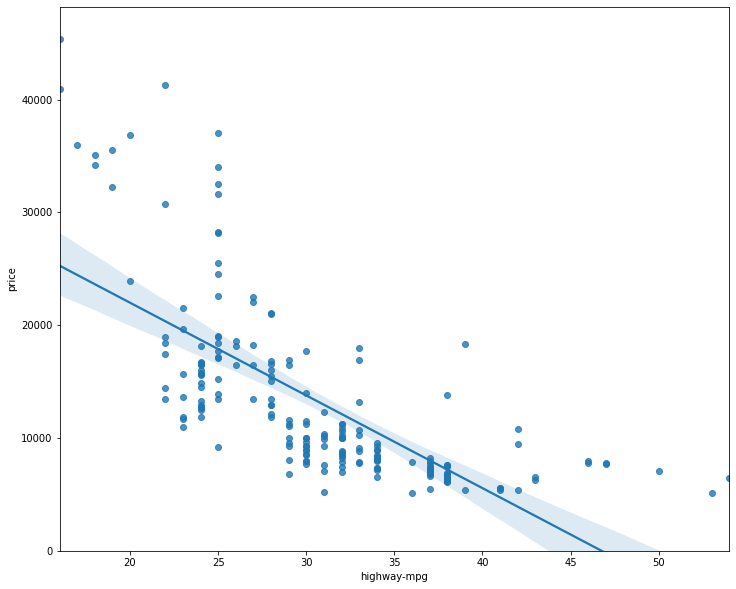

In [38]:
# highway-mpg : potential predictor variable of price
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

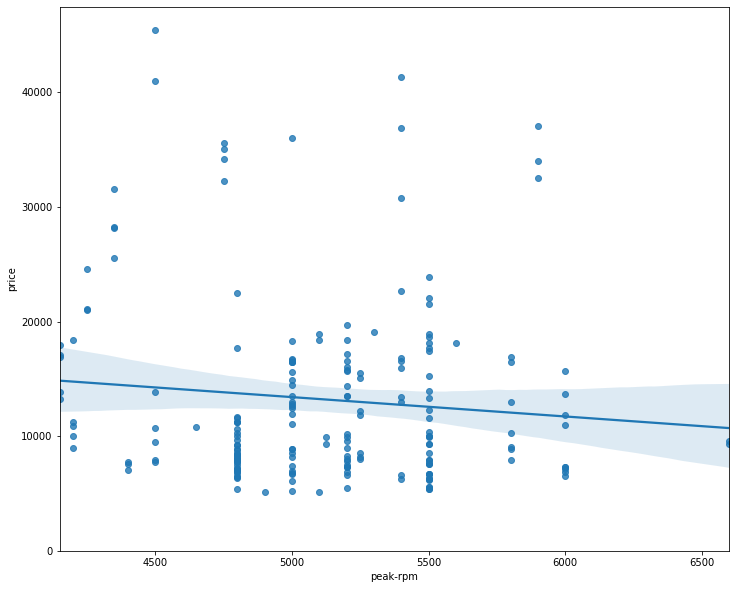

In [39]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

### Question 3
Given the regression plots above is 'peak-rpm' or 'highway-mpg' more strongly correlated with 'price'. Use the method '.corr()' to verify your answer.

In [40]:
df[['peak-rpm','highway-mpg','price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


## Residual Plot
A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

c:\users\yujin\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


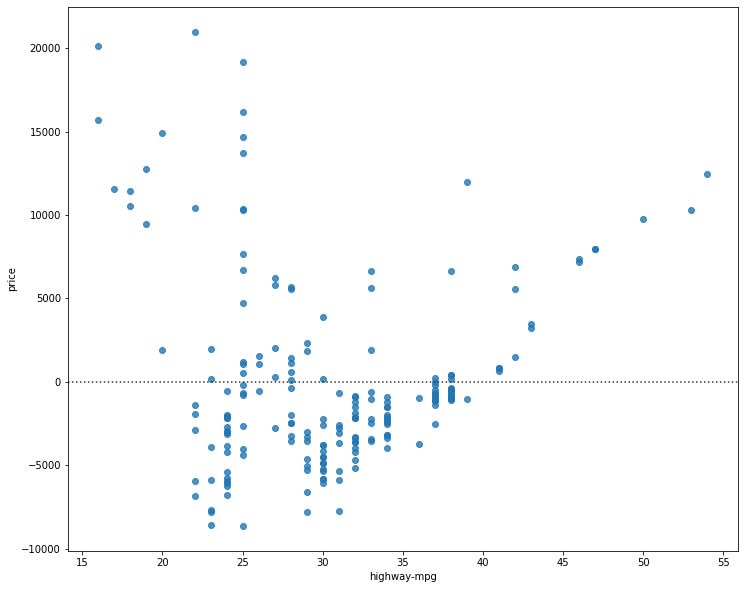

In [41]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

In [42]:
Y_hat = lm.predict(Z)

c:\users\yujin\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\yujin\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


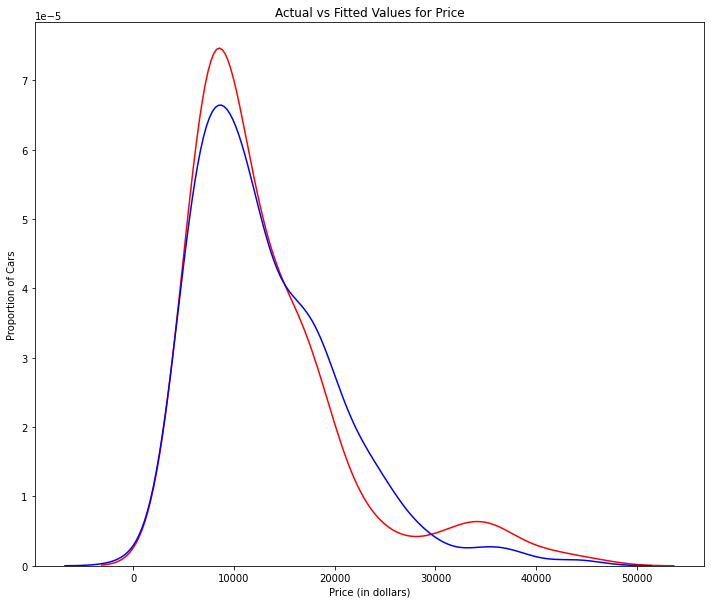

In [43]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

# Polynomial Regression and Pipelines

In [48]:
# function for plotting the data
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [45]:
x = df['highway-mpg']
y = df['price']

In [46]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


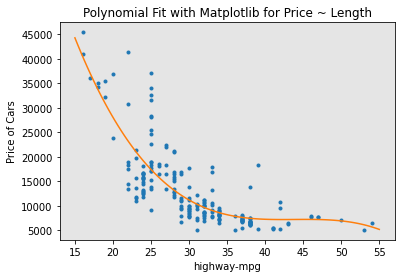

In [47]:
PlotPolly(p, x, y, 'highway-mpg')

In [49]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

### Question 4
Create 11 order polynomial model with the variables x and y from above?

In [51]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


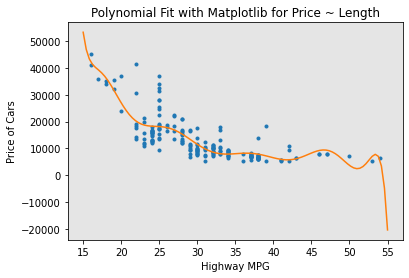

In [52]:
PlotPolly(p1,x,y, 'Highway MPG')

## With Multiple Features

In [53]:
from sklearn.preprocessing import PolynomialFeatures

In [54]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [55]:
Z_pr=pr.fit_transform(Z)

In [56]:
Z.shape

(201, 4)

In [57]:
Z_pr.shape

(201, 15)

## Pipelines

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [64]:
Input = [('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [65]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [66]:
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [67]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

### Question 5
Create a pipeline that Standardizes the data, then perform prediction using a linear regression model using the features Z and target y

In [68]:
Input1 = [('scale', StandardScaler()), ('model', LinearRegression())]

In [69]:
pipe1 = Pipeline(Input1)
pipe1

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [70]:
pipe1.fit(Z, y)

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [72]:
ypipe1 = pipe1.predict(Z)
ypipe1[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

# Measures for In-Sample Evaluation

### Model 1 : Simple Linear Regression

In [73]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [74]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [75]:
from sklearn.metrics import mean_squared_error

In [76]:
# Calculation MSE
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


### Model 2 : Multiple Linear Regression

In [77]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [78]:
Y_predict_multifit = lm.predict(Z)

In [79]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


### Model 3 : Polynomial Fit

In [80]:
from sklearn.metrics import r2_score

In [81]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [82]:
mean_squared_error(df['price'], p(x))

20474146.426361218

# Prediction and Decision Making

In [83]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [84]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [85]:
lm.fit(X, Y)
lm

LinearRegression()

In [86]:
yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

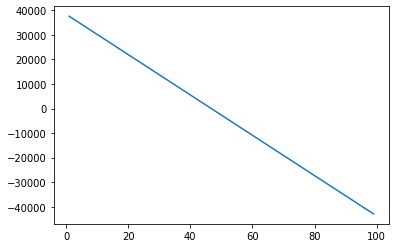

In [87]:
plt.plot(new_input, yhat)
plt.show()

<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>

<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>
    
<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>
    
<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>

Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.